# <center>Ocean Recharge Oscillator for ENSO</center>


In [1]:
# from IPython.core.display import HTML as Center

# Center(""" <style>
# .output_png {
#     text-align: center;
#     vertical-align: middle;
# }
# </style> """)

pdf, jupyter notebook
dependencies
readme

make a github maybe (submit tar/github link)

## 1 Introduction
\begin{equation}
\frac{dh_w}{dt} = -rh_w - \alpha bT_E - \alpha\xi_1
\end{equation}


\begin{equation}
\frac{dT_E}{dt} = RT_E + \gamma h_w - e_n(h_1+bT_E)^3 + \gamma\xi_1 + \xi_2
\end{equation}

Introduction to problem and model


put in the equations


add in units

add in labels (a) (b) on subplots

add in captions

put in RK4 --> talk about updating eta, b

In [4]:
from runclass import *
sns.set_theme(context='paper', style='white', palette=palette,rc={'xtick.bottom': True,'ytick.left': True, 'figure.dpi' : 300})

## 2 Developing the ROM

Using RK: high accuracy, able to use large time step, high computational cost

talk about implementation of RK4
RK4 definition

### 2.1 Neutral Linear ROM
To get a neutral linear ROM, we set $e_n,\xi_1$ and $\xi_2$ to 0. 

RK4 stability analysis 

justify choices in time step?

The period of oscillation is 41.2 +/-           0.2 months


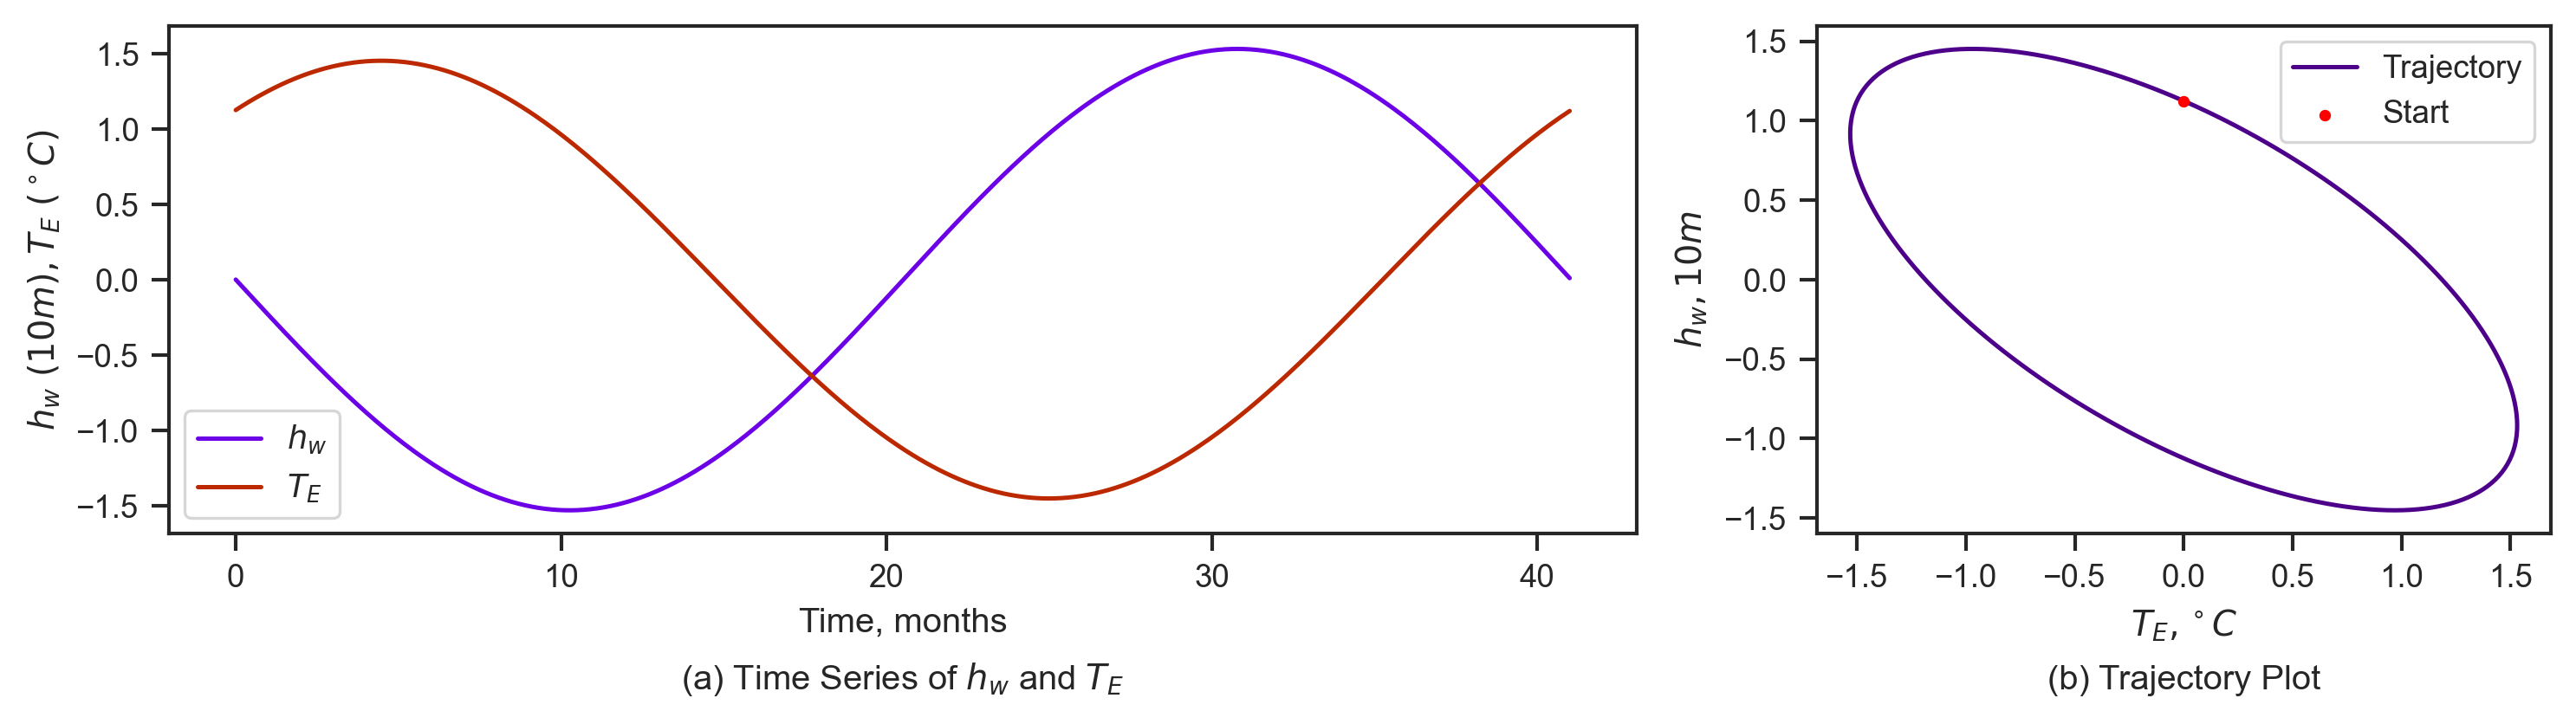

In [5]:
Task_A()

Period of {{a}} months, amplitude of oscillations is constant
Trajectory is regular, and the trajectory in each period is identical

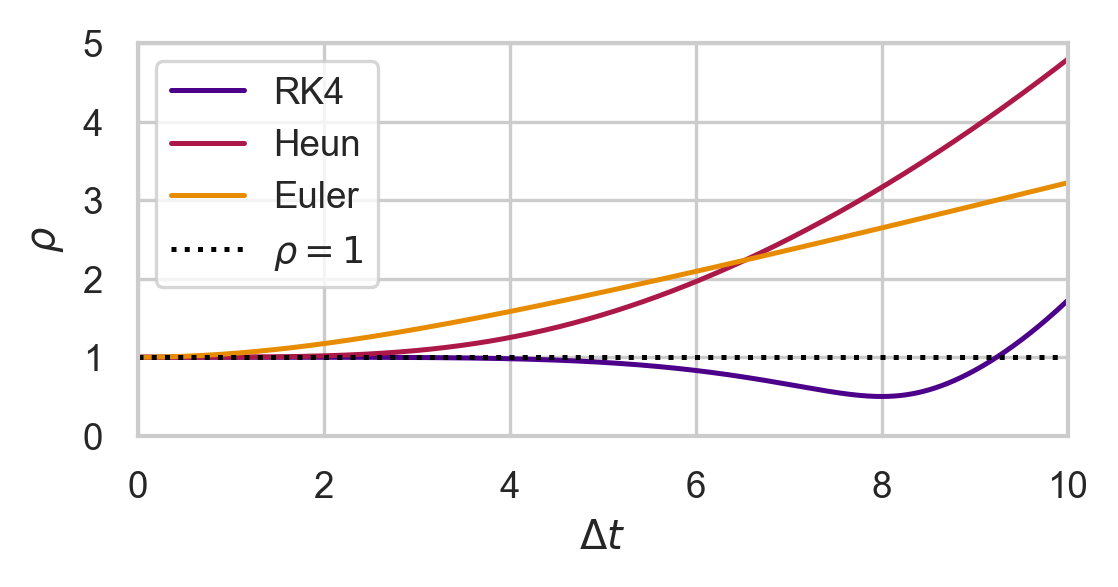

In [6]:
from Stability import stability_plot
stability_plot()
#WHY IS THIS PLOT SO BIG

non dimensionalised dt = 5 is dimensionalised dt of 10 months. able to use timestep that is twice as large. RK4 also has 4th order accuracy.
While RK4 is more computationally intensive than other methods, it makes up for it by being much more accurate (4oa) and by being stable at larger time steps. 

RK4 stable for $\Delta t$ < 9

some damping for $5<\Delta t<9$

would be most accurate to use $\Delta t < 5$

stick with choice to use RK4 since we can use larger timesteps without the scheme being unstable (at least for linear ROM)

use a small dt here since we are only running the scheme for one period (short total time)

## Task B

 $$\mu = 0.75, > \mu_c$$

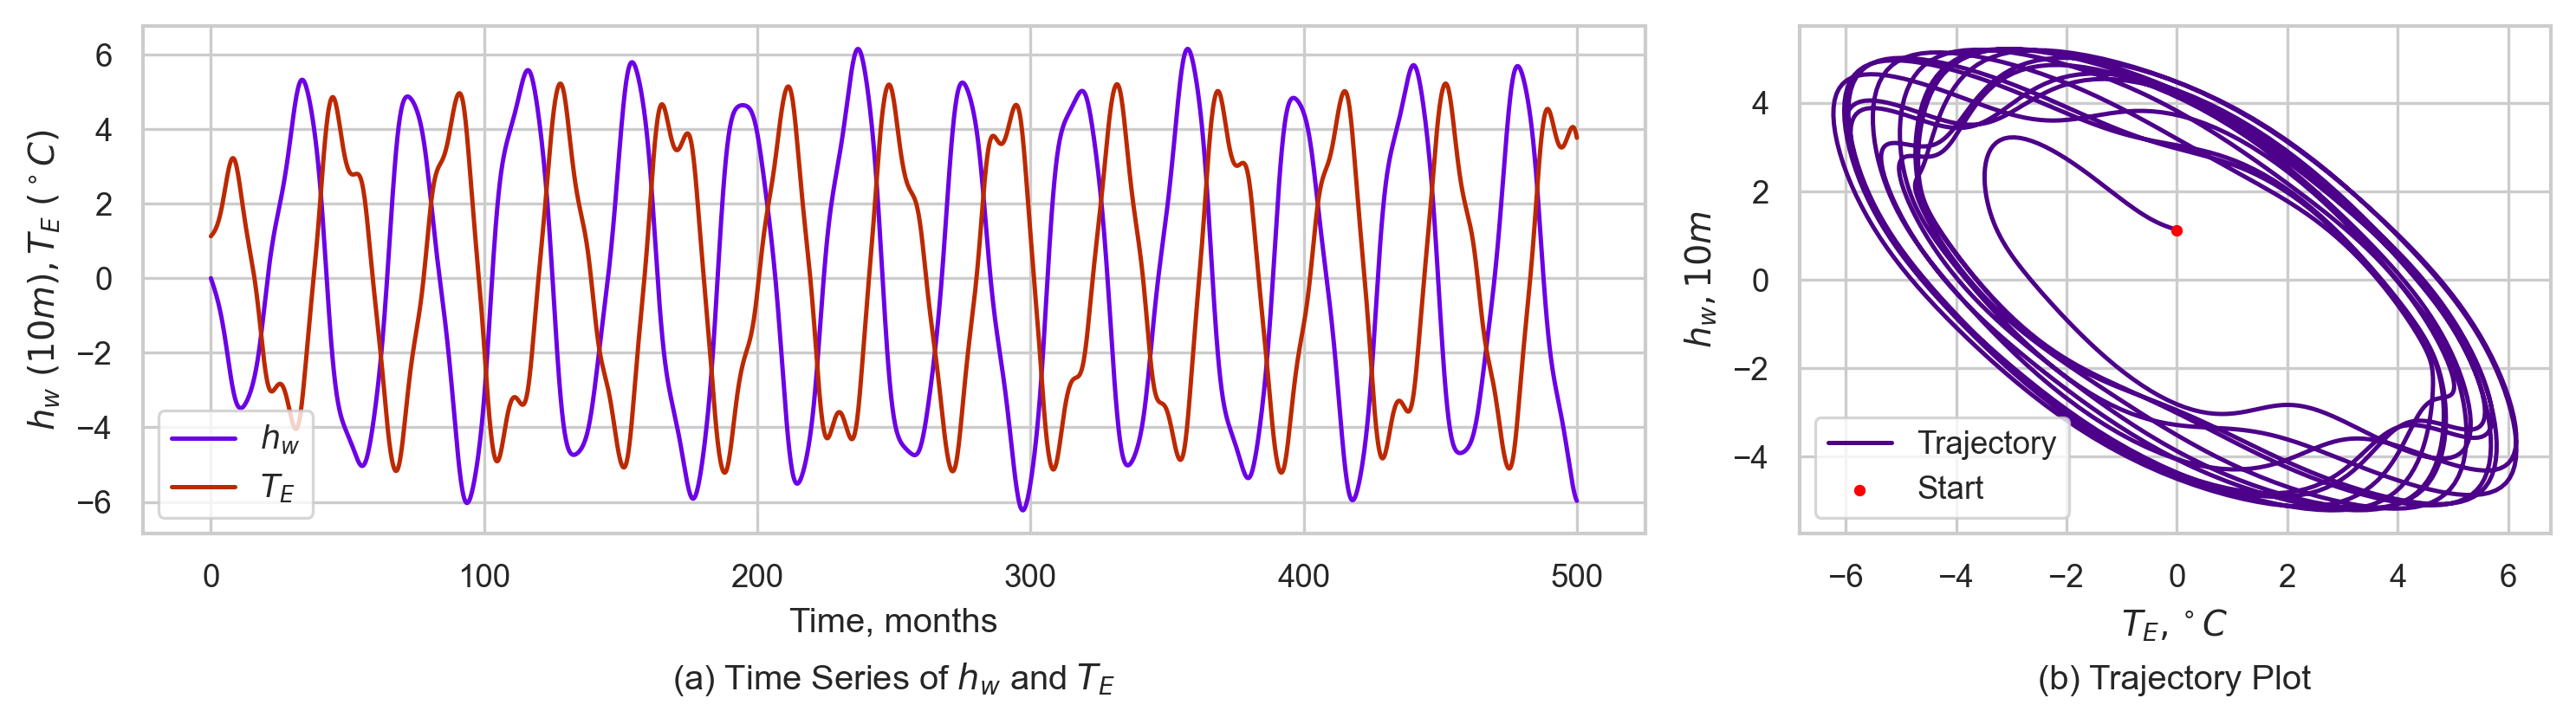

In [7]:
Task_B()

Amplitude of oscillations increase exponentially with time?
Trajectory spirals outward (radius increases) (corresponding to increase in amplitudes)

Larger mu increases faster

 $$\mu = 0.50, < \mu_c$$

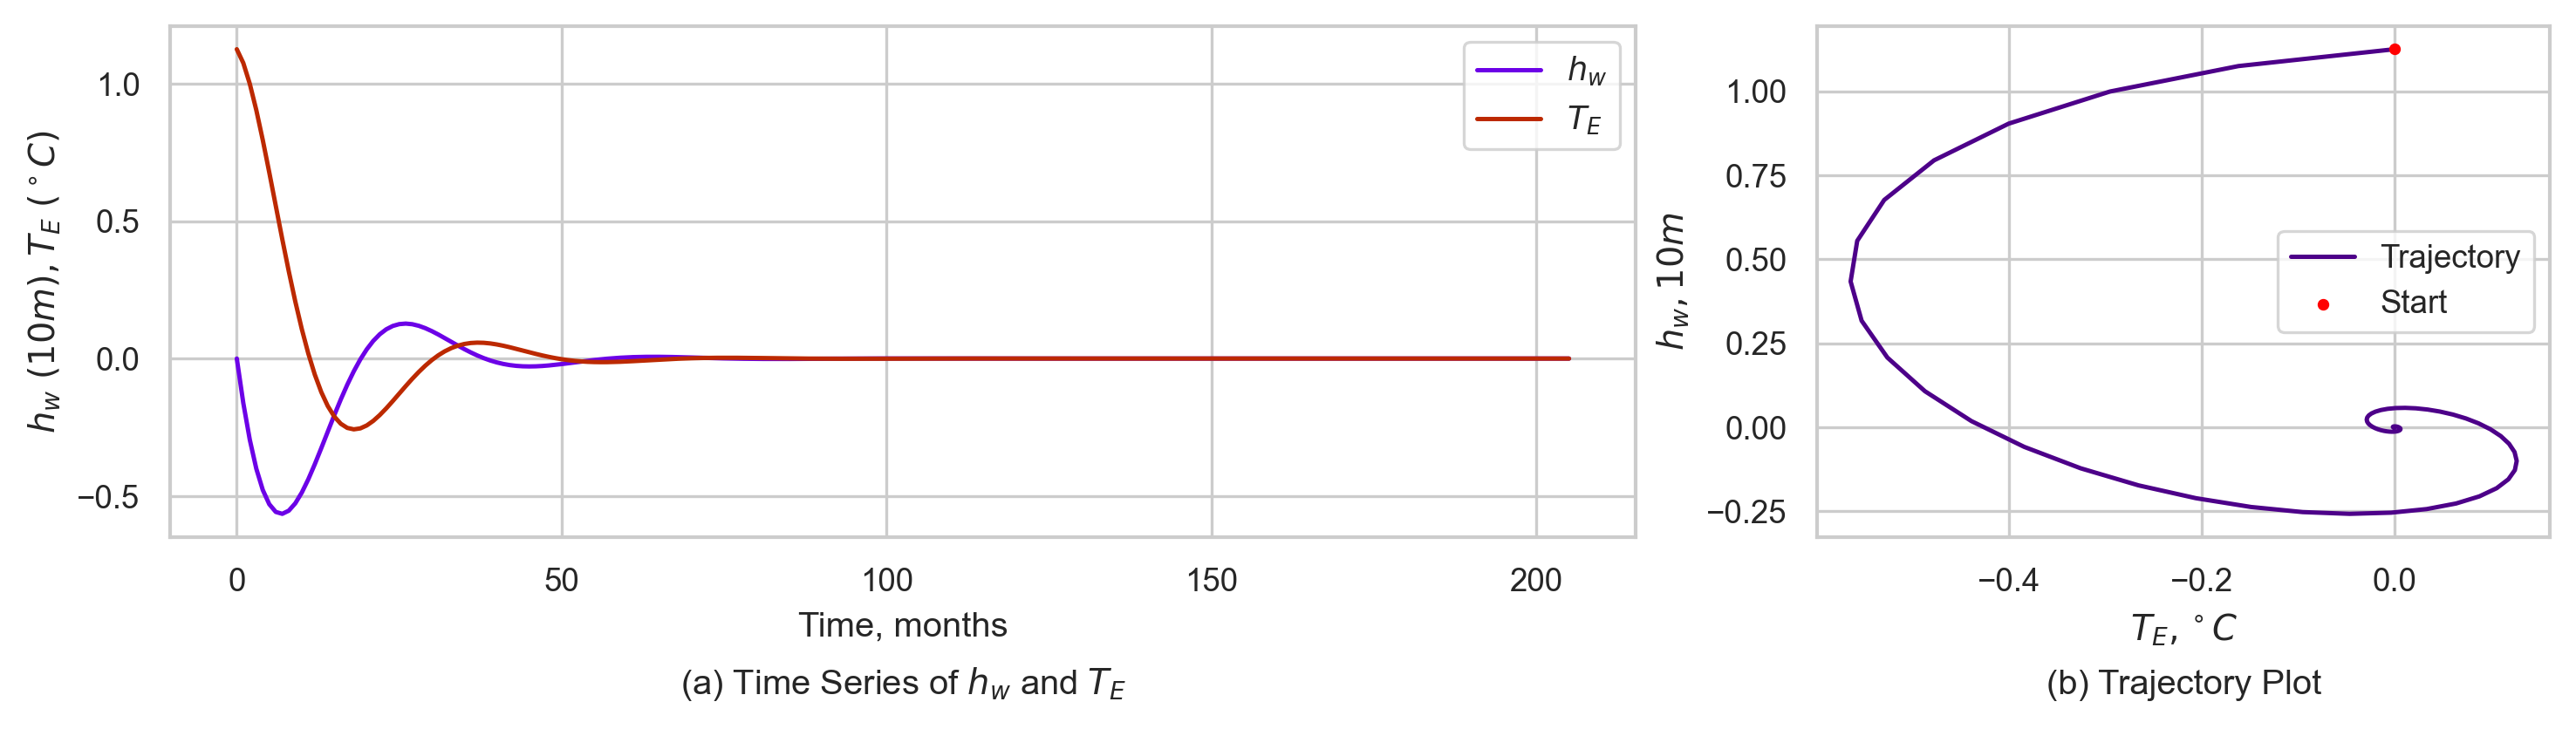

In [10]:
Task_Bb()

Amplitude of oscillations decrease exponentially with time?
Trajectory spirals inward (radius decreases) (corresponding to decrease in amplitudes)

Lower value of mu results in faster decay

## Task C: Including the impact of non-linearity

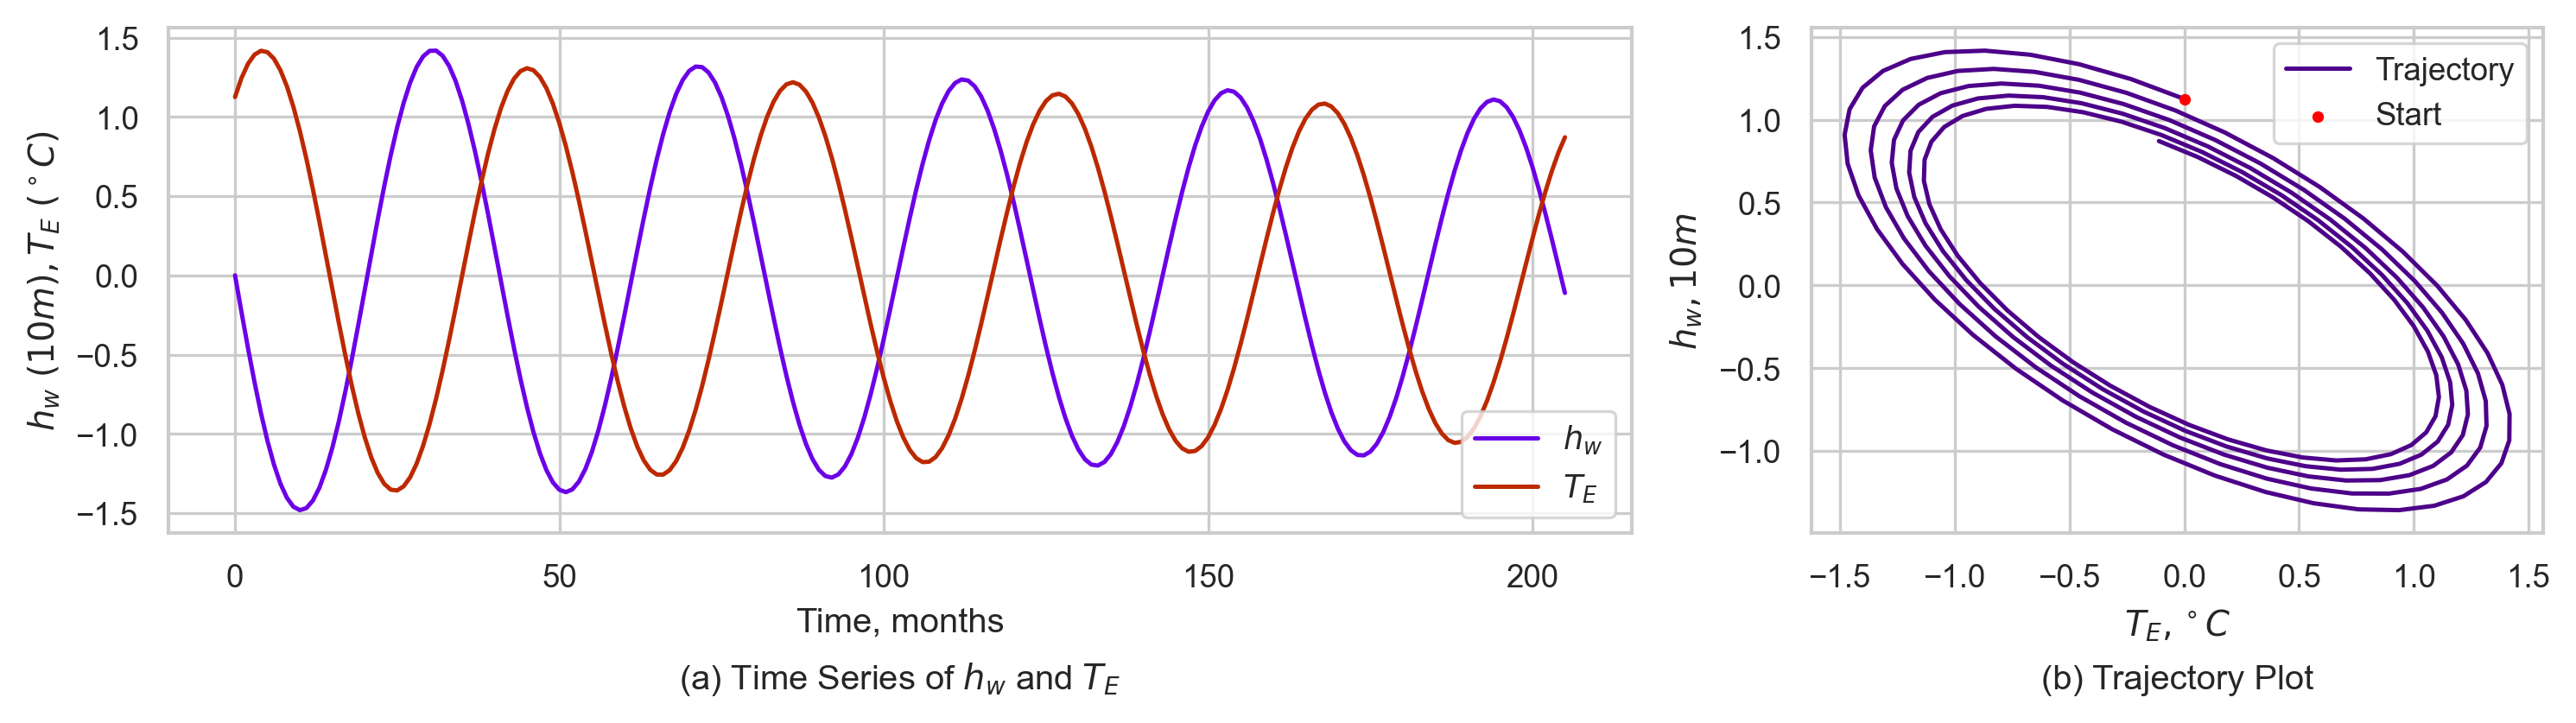

In [11]:
Task_Ca()

Amplitudes of oscillation decreases slightly with time, radius of trajectory decreases with time

Trying with larger value of mu

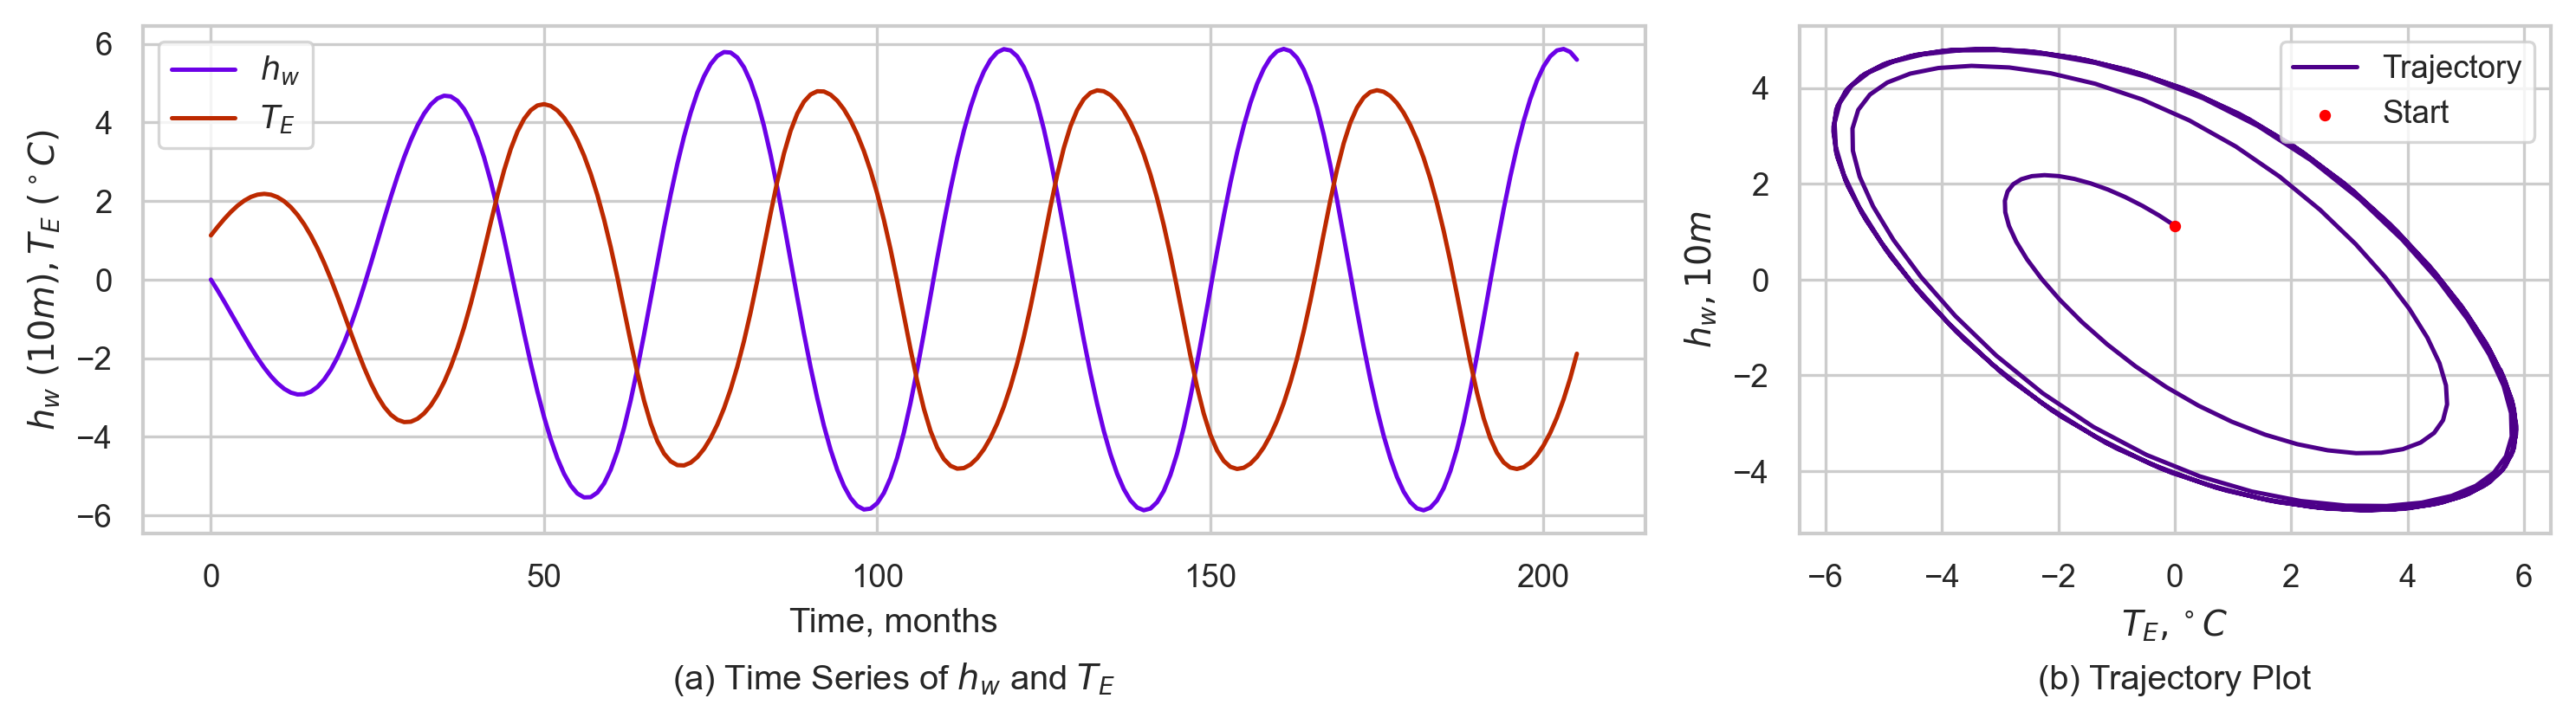

In [12]:
Task_Cb()

Amplitude increases initially, but then remains constant

Radius of trajectory increases, but then remains constant (goes into steady-state)

### Part D: Testing the self-excitation hypothesis

In [13]:
Task_D()

NameError: name 'Task_D' is not defined

stable but variations in amplitude toros (how do you spell it?)

### Task E: Adding noisy wind forcing to the linear model

plot the time series on the same plot?

In [ ]:
endtime = 200
# nt = int(np.round(endtime/day_dim, 0)+1)
mu_val = 2/3
nt = 50000
sim_forcing= ENSO_ROM(T_init, h_init, nt, endtime, en = 0, varyeta1 = True, varymu = True, mu_0 = mu_val, f_ran_forcing = False)
sim_forcing.plot_timeseries_sep()

sim_forcing_ran= ENSO_ROM(T_init, h_init, nt, endtime, en = 0, varyeta1 = True, varymu = True, mu_0 = mu_val, f_ran_forcing = True)
sim_forcing_ran.plot_timeseries_sep()

plt.figure()
plt.plot(sim_forcing.T_ts*T_scale, sim_forcing.h_ts*h_scale/10,
         label = 'Annual Wind Forcing') 
plt.plot(sim_forcing_ran.T_ts*T_scale, sim_forcing_ran.h_ts*h_scale/10,
         label = 'Annual + Random Wind Forcing') 
plt.scatter(sim_forcing.T_ts[0]*T_scale, sim_forcing.h_ts[0]*h_scale/10,
            label = 'Start', marker = '.', color = 'red', zorder = 5)


plt.ylabel('$T_E, ^\circ C$')
plt.xlabel(r'$h_w, 10m$')
plt.legend()

Makes the 'radius' of the trajectory plot larger. Increases the amplitudes of oscillations. Amplitude increased more for h_w than for T_E.

In [ ]:
#create a loop of x times
ensemble_size = 50
h_data = np.zeros((ensemble_size, nt+1))
T_data = h_data.copy()
nt = 50000
fig, axs = plt.subplots(2, 1, sharex = True)

timearr = np.arange(nt+1)*day_dim
for i in range(ensemble_size):
    sim_forcing_ran= ENSO_ROM(T_init, h_init, nt, endtime, en = 0, varyeta1 = True, varymu = True, mu_0 = mu_val, f_ran_forcing = True)
    h_data[i] = sim_forcing_ran.h_ts*h_scale/10 #in 10m
    T_data[i] = sim_forcing_ran.T_ts*T_scale
    a = axs[0].plot(timearr, sim_forcing_ran.T_ts*T_scale, color = 'blue', alpha = 0.1)
    b = axs[1].plot(timearr, sim_forcing_ran.h_ts*h_scale/10, color = 'red', alpha = 0.1)
    
h_mean = np.mean(h_data, axis = 0)
T_mean = np.mean(T_data, axis = 0)
a = axs[0].plot(timearr, T_mean, color = 'cyan', label = 'Random Forcing Mean')
b = axs[1].plot(timearr, h_mean, color = 'cyan', label = 'Random Forcing Mean')

axs[0].plot(timearr, sim_forcing.T_ts*T_scale, label = 'No Random Forcing', color = 'black', linestyle = ':')
axs[1].plot(timearr, sim_forcing.h_ts*h_scale/10, label = 'No Random Forcing', color = 'black', linestyle = ':') 
plt.legend()

### Task F: testing the non-linearity and stochastic forcing together

In [ ]:
sim_forcing_nl= ENSO_ROM(T_init, h_init, nt, 41*10, en = 0.1, varyeta1 = True, varymu = True, mu_0 = 0.70)
plt.figure()
sim_forcing_nl.plot_ts_traj()

### Task G: Ensemble

In [ ]:
#create a loop of x times
Trange = 0.5
hrange = 5
ensemble_size = 50
endtime = 60*12
nt = int(endtime/day_dim)
h_data = np.zeros((ensemble_size, nt+1))
T_data = h_data.copy()

fig, axs = plt.subplots(1, 2, sharex = True, figsize = (16,4))

timearr = np.arange(nt+1)*day_dim
for i in range(ensemble_size):
    sim_ensemble = ENSO_ROM(T_init + random.uniform(-1,1)*Trange, h_init+ random.uniform(-1,1)*hrange, nt, endtime, en = 0.1, varyeta1 = True, varymu = True, mu_0 = 0.68, f_ran_forcing = True)
#     h_data[i] = sim_ensemble.h_ts*sim_ensemble.h_scale/10 #in 10m
#     T_data[i] = sim_ensemble.T_ts*sim_ensemble.T_scale
    a = axs[0].plot(timearr, sim_ensemble.T_ts*T_scale, color = 'blue', alpha = 0.1)
    b = axs[1].plot(timearr, sim_ensemble.h_ts*h_scale/10, color = 'red', alpha = 0.1)
    
# h_mean = np.mean(h_data, axis = 0)
# T_mean = np.mean(T_data, axis = 0)
axs[0].set_ylabel('$T_E, ^\circ C$')
axs[1].set_ylabel('$h_w, 10m$')
axs[1].set_xlabel('Time, months')
fig.suptitle('Plume Diagrams for $T_E$ and $h_w$')

for small changes (0.5 deg, 5m), system does not seem to be chaotic

uncertainty increases with time/change increases with time.

In [ ]:
#create a loop of x times
Trange = 0.5
hrange = 5
ensemble_size = 50
endtime = 60*12
nt = int(endtime/day_dim)
h_data = np.zeros((ensemble_size, nt+1))
T_data = h_data.copy()

fig, axs = plt.subplots(2, 1, sharex = True)

timearr = np.arange(nt+1)*day_dim
for i in range(ensemble_size):
    sim_ensemble= ENSO_ROM(1.125, 0, nt, endtime, en = 0.1, varyeta1 = True, varymu = True, mu_0 = 0.68, f_ran_forcing = False, varyeta2 = False)
    a = axs[0].plot(timearr, sim_ensemble.T_ts*T_scale, color = 'blue', alpha = 0.1)
    b = axs[1].plot(timearr, sim_ensemble.h_ts*h_scale/10, color = 'red', alpha = 0.1)
    axs[0].set_ylabel('$T_E, ^\circ C$')
axs[1].set_ylabel('$h_w, 10m$')
axs[1].set_xlabel('Time, months')
fig.suptitle('Plume Diagrams for $T_E$ and $h_w$')

For a neutral, linear ROM,
$e_n,\xi_1,\xi_2 = 0$. Thus
\begin{equation}
f(\mathbf{U^{(n)}}) = \frac{d}{dt}\mathbf{U^{(n)}} = \mathbf{A}\mathbf{U^{(n)}}
\end{equation}

where 
\begin{equation}
\mathbf{A} = 
\begin{pmatrix}
    -r&-\alpha b\\
    \gamma & R 
\end{pmatrix}, \ \
\mathbf{U^{(n)}} = 
\begin{pmatrix}
    h^{(n)} \\
    T^{(n)}
\end{pmatrix}
\label{Unp1}
\end{equation}

Under 4th order Runge-Kutte,
\begin{equation}
    \mathbf{U^{(n+1)}} = \mathbf{U^{(n)}} + \frac{\Delta t}{6}\left(\mathbf{k_1} + 2\mathbf{k_2} + 2\mathbf{k_3} + \mathbf{k_4}\right)
    \label{RK4}
\end{equation}
where
\begin{align}
\begin{split}
    \mathbf{k_1^{(n)}} &= f\left(\mathbf{U^{(n)}}, (n+\frac{1}{2})\Delta t\right) &=\mathbf{A}\mathbf{U^{(n)}}\\
    \mathbf{k_2^{(n)}} &= f\left(\mathbf{U^{(n)}}+ \frac{\mathbf{k_1}\Delta t}{2}, (n+\frac{1}{2})\Delta t\right) &=\mathbf{A}\left[ I + \frac{\Delta t}{2}\mathbf{A}\right] \mathbf{U^{(n)}}\\ 
    \mathbf{k_3^{(n)}} &= f\left(\mathbf{U^{(n)}}+ \frac{\mathbf{k_2}\Delta t}{2}, (n+\frac{1}{2})\Delta t\right)&= \mathbf{A}\left[\mathbf{I}  + \frac{\Delta t}{2}\mathbf{A}(\mathbf{I} + \frac{\Delta t}{2} \mathbf{A}) \right]\mathbf{U^{(n)}} \\
    \mathbf{k_4^{(n)}} &= f\left(\mathbf{U^{(n)}}+ \mathbf{k_3}\Delta t, (n+1)\Delta t\right))&= \mathbf{A}\left[\mathbf{I}  + \frac{\Delta t}{2}\mathbf{A}(\mathbf{I} + \frac{\Delta t}{2} \mathbf{A}(I + \frac{\Delta t}{2}\mathbf{A})) \right]\mathbf{U^{(n)}} \\
\end{split}
\label{kdef}
\end{align}

Using Equation \ref{RK4} and \ref{kdef}
\begin{equation}
    \mathbf{U^{(n+1)}} = \mathbf{PU^{(n)}} 
\end{equation}
where
\begin{equation}
    \mathbf{P} = \mathbf{I} + \Delta t\left(\mathbf{I} + \frac{\Delta t}{2}\mathbf{A} + \frac{\Delta t^2}{6}\mathbf{A^2} +\frac{\Delta t^3}{24}\mathbf{A^3}\right)
\end{equation}

Spectral radius $\rho$
\begin{equation}
    \rho = |max(\lambda)|
\end{equation}

explain what the spectral radius is

Similar analysis done for Heun and Euler methods to produce plot in section XXXX